In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Data/for_validation.csv', sep=';', encoding='utf-8')

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
pred_labels_nb = np.load('/content/drive/MyDrive/ML_Data/labels_bagging_logreg.npy')

In [ ]:
df['pred_label'] = pred_labels_nb

In [ ]:
df

,ngram,text,pos_tags,label,pred_label
0,к,К проблеме понимания несегментированного текст...,"['ADP', 0, 0, 0]",0,0
1,проблема,К проблеме понимания несегментированного текст...,"['NOUN', 0, 0, 0]",0,1
2,понимание,К проблеме понимания несегментированного текст...,"['NOUN', 0, 0, 0]",0,1
3,несегментировать,К проблеме понимания несегментированного текст...,"['VERB', 0, 0, 0]",0,1
4,текст,К проблеме понимания несегментированного текст...,"['NOUN', 0, 0, 0]",0,1
...,...,...,...,...,...
14031,также лексический соответствие этот,СЕМАНТИКА И ПРАГМАТИКА ПОСЛЕДНЕГО И ПРЕДПОСЛЕД...,"['ADV', 'ADJ', 'NOUN', 'DET']",0,0
14032,лексический соответствие этот прилагательное,СЕМАНТИКА И ПРАГМАТИКА ПОСЛЕДНЕГО И ПРЕДПОСЛЕД...,"['ADJ', 'NOUN', 'DET', 'ADJ']",0,0
14033,соответствие этот прилагательное в,СЕМАНТИКА И ПРАГМАТИКА ПОСЛЕДНЕГО И ПРЕДПОСЛЕД...,"['NOUN', 'DET', 'ADJ', 'ADP']",0,0
14034,этот прилагательное в английский,СЕМАНТИКА И ПРАГМАТИКА ПОСЛЕДНЕГО И ПРЕДПОСЛЕД...,"['DET', 'ADJ', 'ADP', 'ADJ']",0,0


In [ ]:
df['label'].value_counts()

label
0    13003
1     1033
Name: count, dtype: int64

In [ ]:
df['pred_label'].value_counts()

pred_label
0    10041
1     3995
Name: count, dtype: int64

In [ ]:
true_labels = df['label'].to_list()
pred_labels = df['pred_label'].to_list()

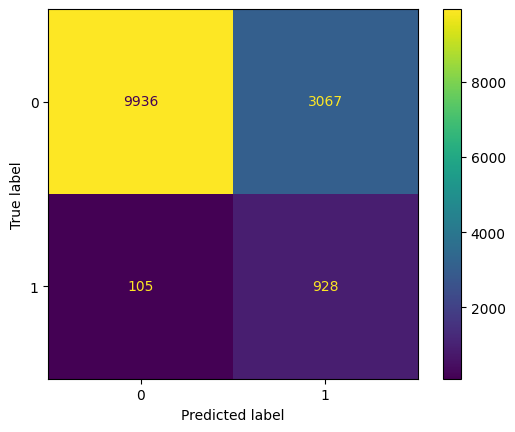

In [ ]:
cm = confusion_matrix(true_labels, pred_labels)
cm_nb_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
df['check'] = df['label'] == df['pred_label']

In [ ]:
true_pos_terms = df[(df['label'] == 1) & (df['check'] == True)]['ngram'].to_list()

In [ ]:
print(len(set(true_pos_terms)))
# set(true_pos_terms)

462


In [ ]:
false_neg_terms = df[(df['label'] == 1) & (df['pred_label'] == 0)]['ngram'].to_list()

In [ ]:
print(len(set(false_neg_terms)))
# set(false_neg_terms)

81


In [ ]:
false_pos_terms = df[(df['label'] == 0) & (df['pred_label'] == 1)]['ngram'].to_list()

In [ ]:
print(len(set(false_pos_terms)))
# set(false_pos_terms)

1982


In [ ]:
df_pos = pd.read_csv('/content/drive/MyDrive/ML_Data/prerpocessed_for_embeddings.csv', sep=';', encoding='utf-8')

In [ ]:
df_terms = df_pos[df_pos['label'] == 1]

In [ ]:
term_pos = (df_terms['pos_tags'].value_counts()[:30]) # 30 самых частотных частеречных паттернов
term_pos_lst = term_pos.keys().to_list()
term_pos_lst

["['NOUN', 0, 0, 0]",
 "['ADJ', 'NOUN', 0, 0]",
 "['NOUN', 'NOUN', 0, 0]",
 "['ADJ', 0, 0, 0]",
 "['ADJ', 'ADJ', 'NOUN', 0]",
 "['ADJ', 'NOUN', 'NOUN', 0]",
 "['NOUN', 'ADJ', 'NOUN', 0]",
 "['VERB', 0, 0, 0]",
 "['VERB', 'NOUN', 0, 0]",
 "['PROPN', 0, 0, 0]",
 "['ADJ', 'NOUN', 'ADJ', 'NOUN']",
 "['NOUN', 'NOUN', 'NOUN', 0]",
 "['ADV', 'ADJ', 'NOUN', 0]",
 "['NOUN', 'PROPN', 0, 0]",
 "['ADJ', 'ADJ', 'ADJ', 'NOUN']",
 "['ADJ', 'ADJ', 0, 0]",
 "['VERB', 'ADJ', 'NOUN', 0]",
 "['VERB', 'NOUN', 'NOUN', 0]",
 "['NOUN', 'NOUN', 'ADJ', 'NOUN']",
 "['NOUN', 'NOUN', 'ADP', 'NOUN']",
 "['ADJ', 'NOUN', 'PROPN', 0]",
 "['PROPN', 'NOUN', 0, 0]",
 "['NOUN', 'ADP', 'NOUN', 0]",
 "['ADV', 0, 0, 0]",
 "['X', 'X', 0, 0]",
 "['NOUN', 'ADJ', 0, 0]",
 "['NOUN', 'ADJ', 'NOUN', 'NOUN']",
 "['X', 0, 0, 0]",
 "['ADV', 'VERB', 'NOUN', 0]",
 "['NOUN', 'ADJ', 'ADJ', 'NOUN']"]

In [ ]:
def get_new_label(dataframe):

  pred = dataframe['pred_label']
  true = dataframe['label']
  pos = dataframe['pos_tags']

  result = pred
  if dataframe['label'] == 0 and dataframe['pred_label'] == 1:
    if dataframe['pos_tags'] not in term_pos_lst:
      result = 0

  return result

In [ ]:
df['new_label'] = df.apply(get_new_label, axis=1)

In [ ]:
df['new_label'].value_counts()

new_label
0    10608
1     3428
Name: count, dtype: int64

In [ ]:
df

,ngram,text,pos_tags,label,pred_label,check,new_label
0,к,К проблеме понимания несегментированного текст...,"['ADP', 0, 0, 0]",0,0,True,0
1,проблема,К проблеме понимания несегментированного текст...,"['NOUN', 0, 0, 0]",0,1,False,1
2,понимание,К проблеме понимания несегментированного текст...,"['NOUN', 0, 0, 0]",0,1,False,1
3,несегментировать,К проблеме понимания несегментированного текст...,"['VERB', 0, 0, 0]",0,1,False,1
4,текст,К проблеме понимания несегментированного текст...,"['NOUN', 0, 0, 0]",0,1,False,1
...,...,...,...,...,...,...,...
14031,также лексический соответствие этот,СЕМАНТИКА И ПРАГМАТИКА ПОСЛЕДНЕГО И ПРЕДПОСЛЕД...,"['ADV', 'ADJ', 'NOUN', 'DET']",0,0,True,0
14032,лексический соответствие этот прилагательное,СЕМАНТИКА И ПРАГМАТИКА ПОСЛЕДНЕГО И ПРЕДПОСЛЕД...,"['ADJ', 'NOUN', 'DET', 'ADJ']",0,0,True,0
14033,соответствие этот прилагательное в,СЕМАНТИКА И ПРАГМАТИКА ПОСЛЕДНЕГО И ПРЕДПОСЛЕД...,"['NOUN', 'DET', 'ADJ', 'ADP']",0,0,True,0
14034,этот прилагательное в английский,СЕМАНТИКА И ПРАГМАТИКА ПОСЛЕДНЕГО И ПРЕДПОСЛЕД...,"['DET', 'ADJ', 'ADP', 'ADJ']",0,0,True,0


In [ ]:
true_labels = df['label'].to_list()
postprocessed_labels = df['new_label'].to_list()

print(classification_report(true_labels, postprocessed_labels))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     13003
           1       0.27      0.90      0.42      1033

    accuracy                           0.81     14036
   macro avg       0.63      0.85      0.65     14036
weighted avg       0.94      0.81      0.85     14036



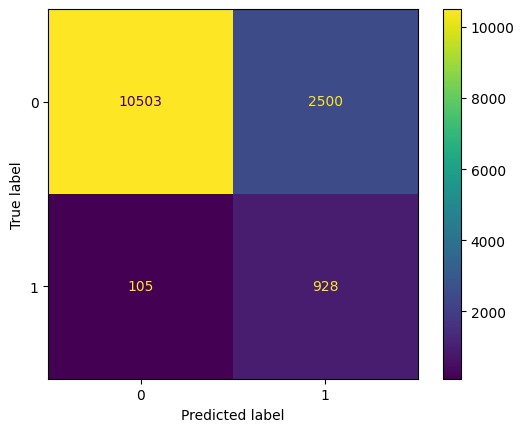

In [ ]:
cm = confusion_matrix(true_labels, postprocessed_labels)
cm_nb_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
false_pos_terms = df[(df['label'] == 0) & (df['new_label'] == 1)]['ngram'].to_list()

In [ ]:
print(len(set(false_pos_terms)))
false_terms = set(false_pos_terms)

1463


In [ ]:
[term for term in false_pos_terms if len(term.split()) == 1]

['проблема',
 'понимание',
 'несегментировать',
 'текст',
 'материал',
 'метеорологический',
 'телеграмма',
 'фокус',
 'внимание',
 'проблема',
 'восстановление',
 'структура',
 'несегментировать',
 'текст',
 'процедура',
 'исходный',
 'лексический',
 'цепочка',
 'последовательность',
 'тематически',
 'связный',
 'фрагмент',
 'рамка',
 'семантический',
 'интерпретация',
 'определяться',
 'нарративный',
 'структура',
 'текст',
 'тип',
 'структура',
 'эпизод',
 'тематический',
 'анализ',
 'нарративный',
 'структура',
 'текст',
 'устанавливать',
 'семантический',
 'связь',
 'сфера',
 'действие',
 'темпоральный',
 'подход',
 'универсализация',
 'модель',
 'смысл',
 'текст',
 'направление',
 'получение',
 'детальный',
 'описание',
 'пригодный',
 'компьютерный',
 'система',
 'построение',
 'модель',
 'тип',
 'смысл',
 'текст',
 'предлагаться',
 'новый',
 'репрезентация',
 'общий',
 'закономерность',
 'поверхностный',
 'кодирование',
 'семантический',
 'признак',
 'развивать',
 'подход',
 'ун

In [ ]:
'несегментировать текст' in df_terms['ngram'].to_list()

True

In [ ]:
'фокус внимание' in df_terms['ngram'].to_list()

True

In [ ]:
'тематически связный фрагмент' in df_terms['ngram'].to_list()

True

In [ ]:
'нарративный структура текст' in df_terms['ngram'].to_list()

True

In [ ]:
'семантический связь' in df_terms['ngram'].to_list()

True

In [ ]:
'компьютерный система' in df_terms['ngram'].to_list()

True

In [ ]:
'модель смысл текст' in df_terms['ngram'].to_list()

True